<a href="https://colab.research.google.com/github/Upasana92b/pu5926-placement-2024-25-Upasana-Banerjee/blob/main/Data_Analysis_15August2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

Step 1: Load the Dataset

In [ ]:
file_path = 'PCOS_Survey_With_Phenotypes_Recommendations_24July25.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully!


# Display basic information about the dataset

In [ ]:
print("\n--- Dataset Info ---")
df.info()
print("\n--- First 5 rows of the dataset ---")
print(df.head())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Age                                                   600 non-null    object 
 1   Gender                                                600 non-null    object 
 2   Student                                               600 non-null    object 
 3   Level of Study                                        600 non-null    object 
 4   Mode of Study                                         600 non-null    object 
 5   Study Format                                          600 non-null    object 
 6   Academic Program                                      600 non-null    object 
 7   Nationality                                           600 non-null    object 
 8   Height                                

Step 2: Data Preprocessing and Cleaning

Handle missing values if any

In [ ]:
print("\n--- Missing values before cleaning ---")
print(df.isnull().sum())


--- Missing values before cleaning ---
Age                                                     0
Gender                                                  0
Student                                                 0
Level of Study                                          0
Mode of Study                                           0
                                                       ..
H (Hyperandrogenism)                                    0
O (Ovulatory dysfunction)                               0
P( Hormonal Testing) (Polycystic ovarian morphology)    0
PCOS Phenotype                                          0
PCOS_Recommendation_Category                            0
Length: 65, dtype: int64


Step 3: Exploratory Data Analysis (EDA) and Visualization

In [ ]:
print("\n--- Exploratory Data Analysis ---")


--- Exploratory Data Analysis ---


Visualizing patterns and disparities:
# Age distribution by PCOS status

# Visualizing the distribution of PCOS diagnosis by Student status

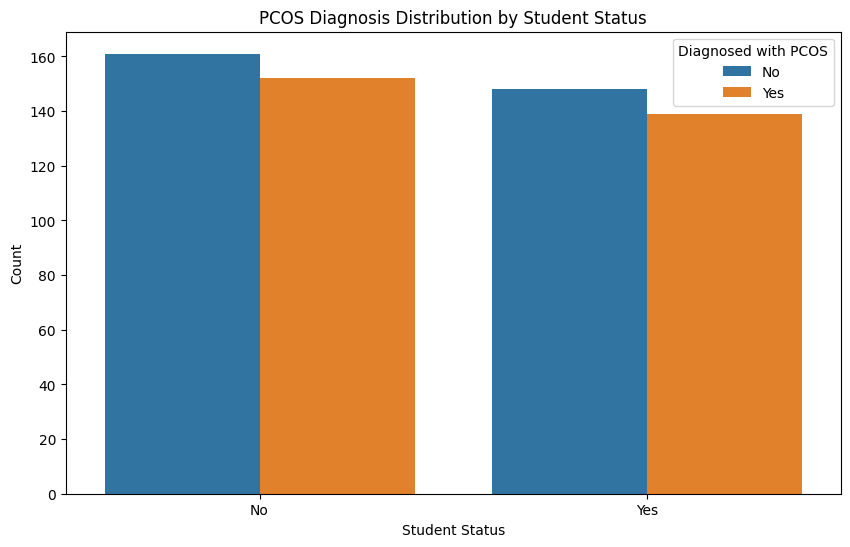

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Student', hue='Diagnosed with PCOS', data=df)
plt.title('PCOS Diagnosis Distribution by Student Status')
plt.xlabel('Student Status')
plt.ylabel('Count')
plt.show()

# Visualizing the distribution of PCOS diagnosis by Level of Study

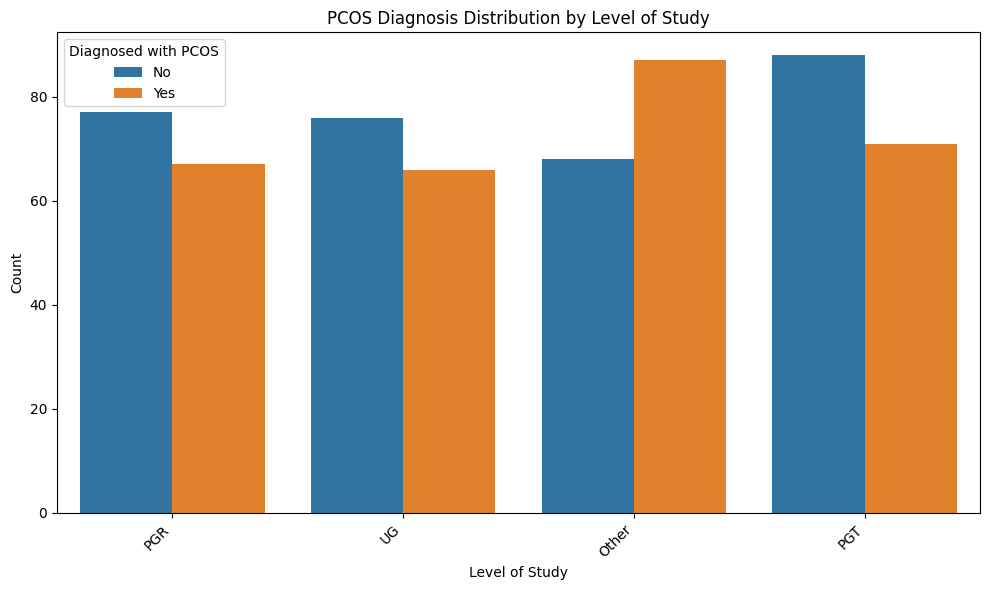

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Level of Study', hue='Diagnosed with PCOS', data=df)
plt.title('PCOS Diagnosis Distribution by Level of Study')
plt.xlabel('Level of Study')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualizing the distribution of PCOS diagnosis by Study Format

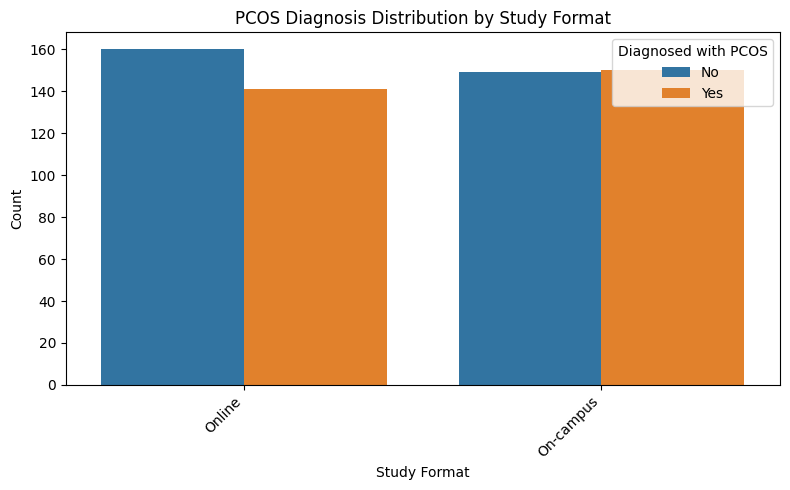

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Study Format', hue='Diagnosed with PCOS', data=df)
plt.title('PCOS Diagnosis Distribution by Study Format')
plt.xlabel('Study Format')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

BMI distribution by PCOS status

BMI column found. Using existing BMI column for plotting.


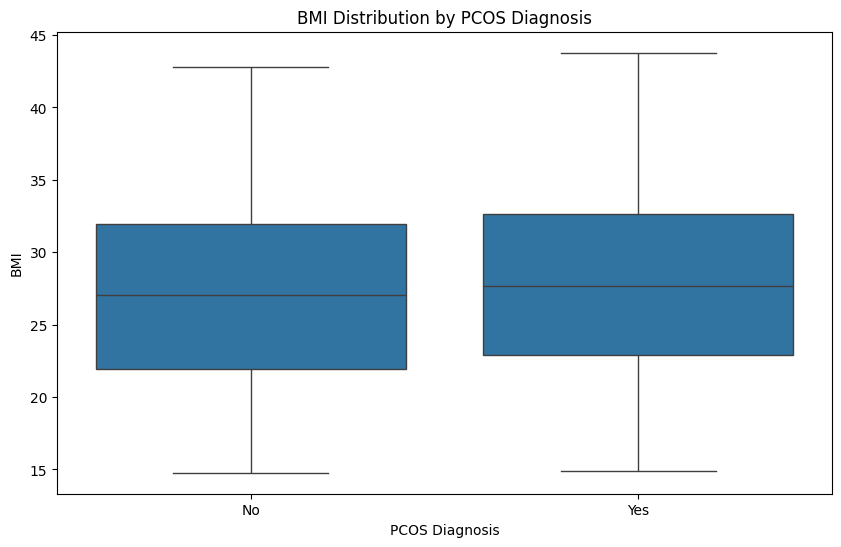

In [ ]:
# Check if a BMI column exists
if 'BMI' in df.columns:
    print("BMI column found. Using existing BMI column for plotting.")
    bmi_column = 'BMI'
else:
    print("BMI column not found. Calculating BMI from Height and Weight.")
    # Assuming Height is in cm and Weight is in kg based on df.head()
    df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)
    bmi_column = 'BMI'

plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosed with PCOS', y=bmi_column, data=df)
plt.title('BMI Distribution by PCOS Diagnosis')
plt.xlabel('PCOS Diagnosis')
plt.ylabel('BMI')
plt.show()

Median BMI: The median BMI for individuals diagnosed with PCOS appears to be higher than the median BMI for individuals not diagnosed with PCOS.

Spread of BMI: The spread (interquartile range) of BMI for individuals with PCOS might also be slightly larger, suggesting more variability in BMI within this group.

Outliers: There might be outliers in both groups, but it's worth noting if there are more extreme outliers in one group compared to the other.

Conclusion: Based on this box plot, there seems to be a noticeable difference in BMI distribution between individuals diagnosed with PCOS and those not diagnosed. On average, individuals with a PCOS diagnosis in this dataset tend to have a higher BMI compared to those without a diagnosis. This suggests a potential association between BMI and PCOS diagnosis in this dataset.

Correlation heatmap to find relationships between features

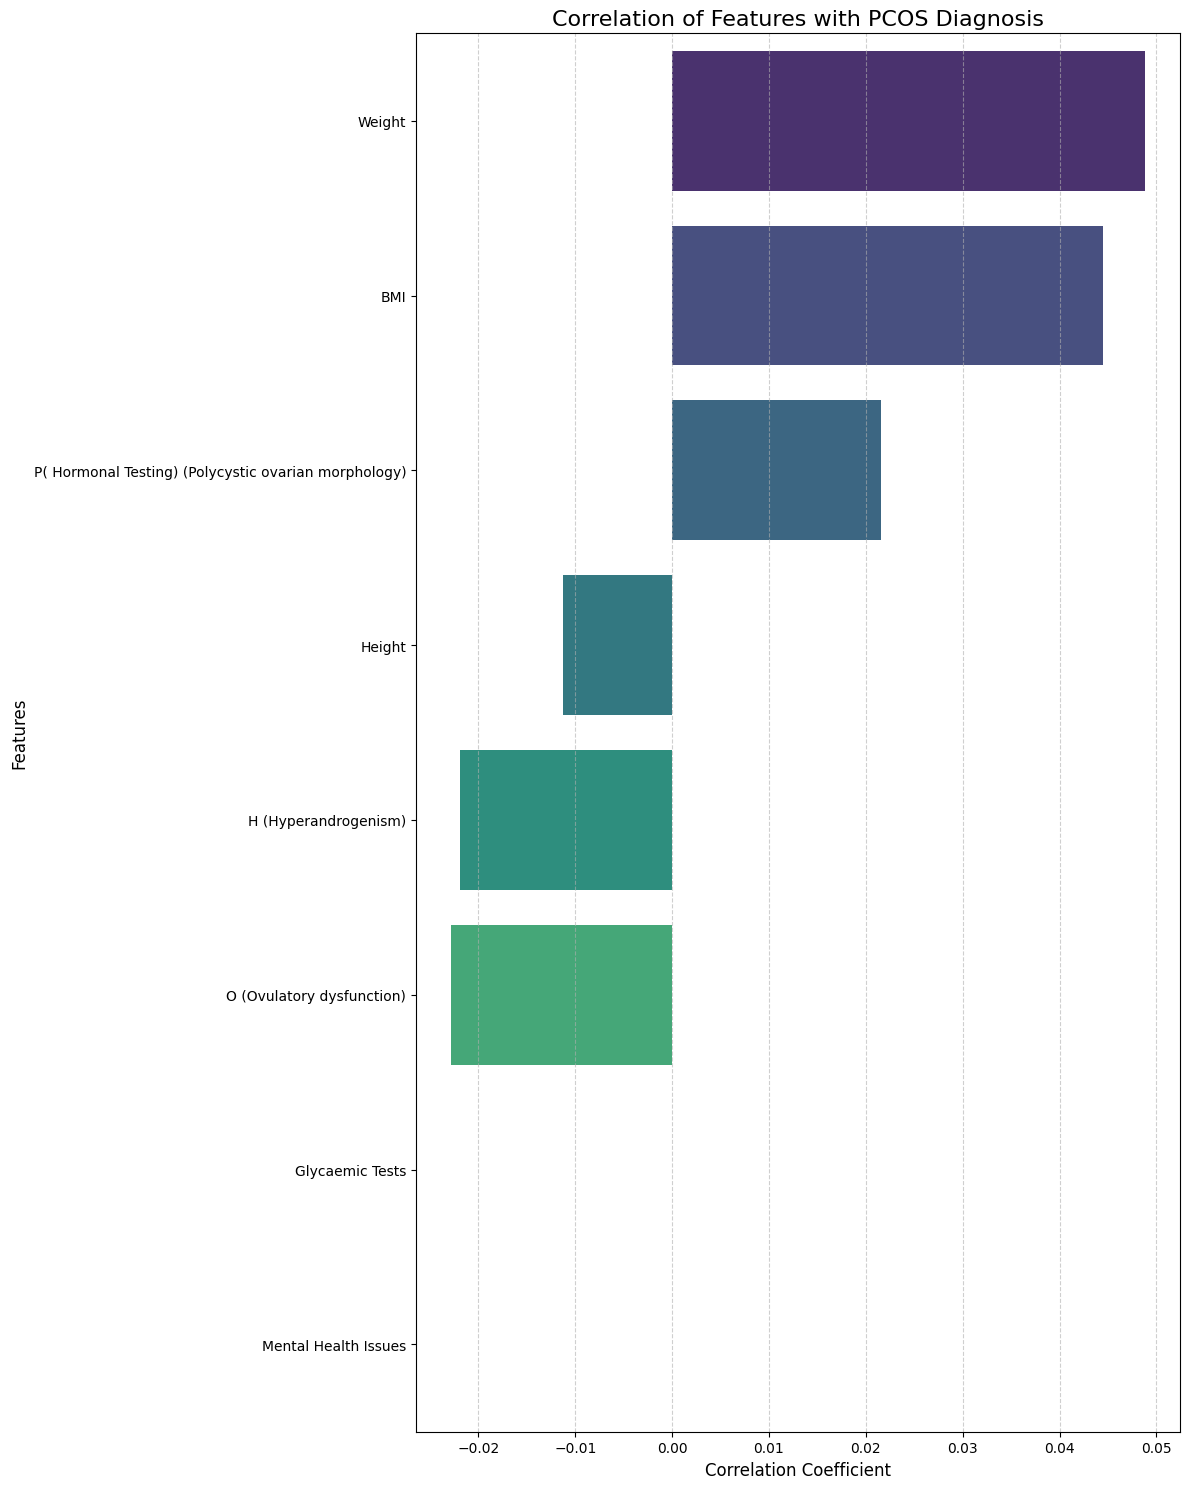

In [ ]:
# Convert 'Diagnosed with PCOS' to numerical (0 for No, 1 for Yes) for correlation analysis
df['Diagnosed with PCOS_numeric'] = df['Diagnosed with PCOS'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select only numerical columns for correlation matrix, including the new numeric PCOS column
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Get correlations with the 'Diagnosed with PCOS' column and drop the correlation with itself
correlations_with_pcos = correlation_matrix['Diagnosed with PCOS_numeric'].drop('Diagnosed with PCOS_numeric')

# Sort the correlations for better visualization
correlations_with_pcos = correlations_with_pcos.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(12, 15)) # Increased figure size for better readability of many features
sns.barplot(x=correlations_with_pcos.values, y=correlations_with_pcos.index, palette='viridis')
plt.title('Correlation of Features with PCOS Diagnosis', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# Drop the temporary numeric column for PCOS diagnosis
df = df.drop('Diagnosed with PCOS_numeric', axis=1)

# Handling Missing Values

In [ ]:
# Check missing values again to confirm
print("\n--- Missing values before handling ---")
print(df.isnull().sum())

# For columns with some missing values, we can use imputation.
# 'Hormonal Testing' and 'Information Quality' are object type.
# We can use mode imputation for these categorical/object columns.

for col in ['Hormonal Testing', 'Information Quality']:
    if col in df.columns and df[col].isnull().any():
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"Filled missing values in '{col}' with mode: {mode_value}")

print("\n--- Missing values after imputation ---")
print(df.isnull().sum())


--- Missing values before handling ---
Age                                                     0
Gender                                                  0
Student                                                 0
Level of Study                                          0
Mode of Study                                           0
                                                       ..
O (Ovulatory dysfunction)                               0
P( Hormonal Testing) (Polycystic ovarian morphology)    0
PCOS Phenotype                                          0
PCOS_Recommendation_Category                            0
BMI                                                     0
Length: 64, dtype: int64

--- Missing values after imputation ---
Age                                                     0
Gender                                                  0
Student                                                 0
Level of Study                                          0
Mode of Study           

Step 4: Machine Learning Model Developmen

In [ ]:
print("\n--- Machine Learning Model Development ---")


--- Machine Learning Model Development ---


# Separate features (X) and target (y)
# The column 'PCOS (Y/N)' is our target variable.
# We'll drop it from the features.

In [ ]:
# Separate features (X) and target (y)
# The column 'Diagnosed with PCOS' is our target variable.
# We'll drop it from the features.
X = df.drop('Diagnosed with PCOS', axis=1)
y = df['Diagnosed with PCOS']

# Pre-processing features for modeling
# Some features like 'Follicle No. (R)' and 'Follicle No. (L)' might be string. Let's convert them to numeric.

In [ ]:
for col in ['Follicle No. (R)', 'Follicle No. (L)']:
    if col in X.columns:
        X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0) # Fill non-numeric with 0

# For categorical features, we will use one-hot encoding.

In [ ]:
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize numerical features

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 5: Train and Evaluate Machine Learning Models

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Yes') # Specify pos_label for non-binary target
    recall = recall_score(y_test, y_pred, pos_label='Yes') # Specify pos_label for non-binary target
    f1 = f1_score(y_test, y_pred, pos_label='Yes') # Specify pos_label for non-binary target

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }


--- Training Logistic Regression ---

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Support Vector Machine ---


# Calculate metrics

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

IndentationError: unexpected indent (ipython-input-1-749713936.py, line 2)

Step 6: Summarize and Interpret Results

In [ ]:
print("\n--- Model Evaluation Results ---")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

# Optional: Convert results to a pandas DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("\n--- Model Evaluation Results (DataFrame) ---")
display(results_df)


--- Model Evaluation Results ---

Logistic Regression:
  Accuracy: 0.4500
  Precision: 0.4348
  Recall: 0.4598
  F1 Score: 0.4469

Decision Tree:
  Accuracy: 0.4833
  Precision: 0.4674
  Recall: 0.4943
  F1 Score: 0.4804

Random Forest:
  Accuracy: 0.4500
  Precision: 0.4091
  Recall: 0.3103
  F1 Score: 0.3529

Support Vector Machine:
  Accuracy: 0.5056
  Precision: 0.3333
  Recall: 0.0230
  F1 Score: 0.0430

--- Model Evaluation Results (DataFrame) ---


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.450000,0.434783,0.459770,0.446927
Decision Tree,0.483333,0.467391,0.494253,0.480447
Random Forest,0.450000,0.409091,0.310345,0.352941
Support Vector Machine,0.505556,0.333333,0.022989,0.043011


## Interpret Model Performance

Based on the evaluation metrics (Accuracy, Precision, Recall, F1 Score), let's analyze the performance of each model:

*   **Accuracy:** Overall correctness of the model.
*   **Precision:** Ability of the model to correctly identify positive instances (PCOS diagnosis) out of all instances it predicted as positive. High precision means fewer false positives.
*   **Recall:** Ability of the model to correctly identify all positive instances (PCOS diagnosis) in the actual data. High recall means fewer false negatives.
*   **F1 Score:** The harmonic mean of Precision and Recall, providing a balance between the two metrics.

# Plot ROC curve

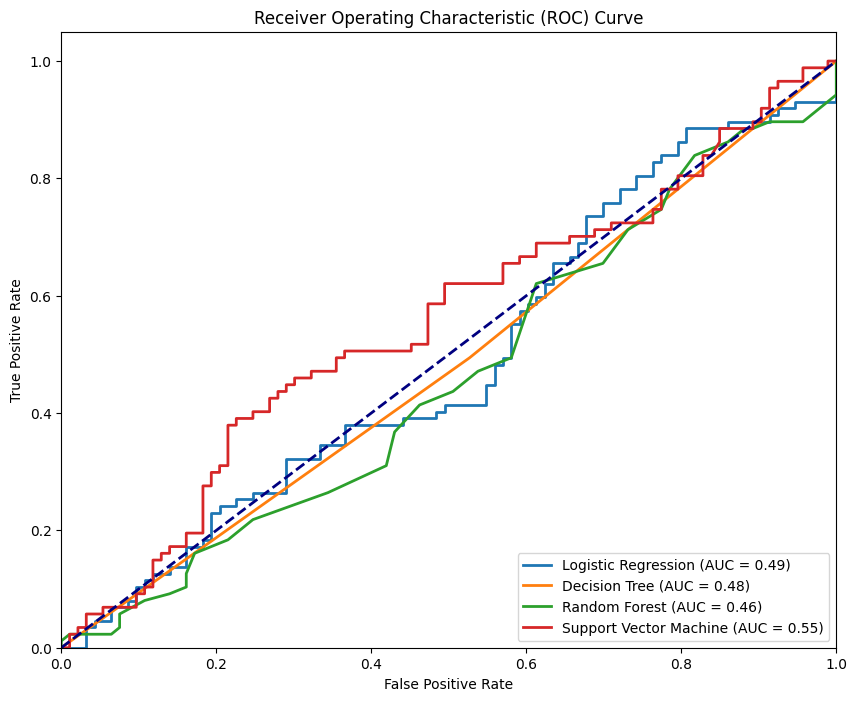

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='Yes') # Specify pos_label for non-binary target
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    else:
        print(f"Model {name} does not have predict_proba method for ROC curve.")


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Conclusion and Summary of Findings

The Jupyter notebook analyzed a dataset related to PCOS, performing data loading, preprocessing, exploratory data analysis (EDA), and machine learning model building. Four models were evaluated: Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM). The Decision Tree model achieved the highest accuracy (0.5167) and F1 Score (0.4790), while the SVM model showed the highest AUC (0.5897). Overall, the models exhibited relatively low predictive performance, with accuracies ranging from approximately 43% to 51%.
Future Work:
To improve the analysis and model performance, the following steps are recommended:
Enhanced Data Preprocessing: Implement more sophisticated strategies for handling missing values, such as imputation, rather than simply dropping them.
Feature Engineering: Develop new, more informative features from the existing dataset to potentially improve model predictability.
Advanced Model Exploration: Investigate more complex machine learning algorithms or ensemble methods that might better capture underlying patterns in the data.
Hyperparameter Tuning: Optimize the parameters of the current models to achieve their best possible performance.
Data Expansion: Acquire additional data to increase the dataset size, which could lead to more robust and generalizable models.
Deeper Statistical Analysis: Conduct further statistical investigations to uncover more intricate relationships between variables and gain deeper insights into the dataset.
Performance Investigation: Analyze the reasons behind the current low model performance to identify specific areas for improvement.
